In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

- 통화 데이터 : SK Big Data Hub 2021년 초에 종료하였음. 다운받아둔 파일 사용.
- 강수량 데이터 : 기상청 기상자료개방포털 데이터 있음

# Warm Up

In [ ]:
# @title 기본 세팅 코드
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("ggplot")
plt.rc("font", family = "NanumGothic")

import seaborn as sns

In [ ]:
# @title 프로그램 12-1 : 통화 데이터 가져오기

# 2020년 08월 통화 데이터를 데이터 프레임으로 가져오기
call_df = pd.read_csv("Calldata_2008.csv", encoding="UTF-8", parse_dates=["일자(YYYYMMDD)"])

# 통화 데이터 열의 이름 변경하기
call_df.columns = ["일자", "연령", "성별", "발신지1", "발신지2", "대분류", "중분류", "통화비율"]

call_df

In [ ]:
# @title 프로그램 12-2 : 강수량 데이터 가져오기

# 2020년 08우러 강수량 데이터를 데이터 프레임으로 가져오기
rain_df = pd.read_csv("Raindata_2008.csv", encoding="cp949", parse_dates = ["일시"])

# 강수량 데이터의 열 이름 변경하기
rain_df.columns = ["지점번호", "지점명", "일자", "강수량", "1시간최대강수량", "1시간최대강수량시각"]

rain_df

In [ ]:
# @title 프로그램 12-3 : call_df의 '대분류' 열에서 유일한 값 확인하기

# 데이터가 무엇으로 구성되어있는지 보고 싶다면 .unique()로 열의 고유값을 볼 수 있다.
call_df["대분류"].unique()

# 중분류에서
# call_df["중분류"].unique()

In [ ]:
# @title 프로그램 12-4 : 조건을 만족하는 데이터 추출하기

# call 데이터 프레임에서 발신지가 서울이고, 대분류가 음식점인 데이터 추출하기
is_true = (call_df["발신지1"] == "서울") & (call_df["대분류"] == "음식점")
call_df = call_df[is_true]
call_df

In [ ]:
# @title 새로운 call_df를 이용하여 음식점의 종류 확인
call_df["중분류"].unique()

In [ ]:
# @title 프로그램 12-5 : 통화 데이터의 불필요한 열 삭제하기

# 통화 데이터에서 불필요한 열 삭제하고 저장하기
call_df = call_df.drop(columns = ["연령", "성별", "발신지1", "발신지2", "통화비율", "대분류"])

call_df

In [ ]:
# @title 프로그램 12-6 : 강수량 데이터의 불필요한 열 삭제하기

# 강수량 데이터에서 불필요한 열 삭제하고 저장하기
rain_df = rain_df.drop(columns= ["지점번호", "지점명", "1시간최대강수량", "1시간최대강수량시각"])

rain_df

In [ ]:
# @title 프로그램 12-7 : 강수량 데이터의 결측값 처리하기

# 강수량 열의 결측값을 모두 0으로 대체하기
rain_df["강수량"] = rain_df["강수량"].fillna(0)
rain_df

In [119]:
# @title 프로그램 12-8 : 두 개의 데이터 프레임을 병합하기

# 두 개의 데이터 프레임을 병합하여 tot_df 변수에 저장하기
tot_df = pd.merge(call_df, rain_df, on = "일자")
tot_df

print(call_df.dtypes)
print(rain_df.dtypes)
print(tot_df.dtypes)
print(tot_df)

일자     datetime64[ns]
중분류            object
dtype: object
일자     datetime64[ns]
강수량           float64
dtype: object
일자     datetime64[ns]
중분류            object
강수량           float64
dtype: object
             일자 중분류   강수량
0    2020-08-23  중식   0.0
1    2020-08-23  한식   0.0
2    2020-08-23  한식   0.0
3    2020-08-23  양식   0.0
4    2020-08-23  한식   0.0
...         ...  ..   ...
7716 2020-08-11  한식  97.0
7717 2020-08-11  한식  97.0
7718 2020-08-11  한식  97.0
7719 2020-08-11  치킨  97.0
7720 2020-08-11  한식  97.0

[7721 rows x 3 columns]


# Draw Code

In [ ]:
# @title 프로그램 12-9 : 비 안 오는 날의 배달량 확인하기

# 강수량인 0인 날의 데이터만 no_rain 변수에 저장하기
no_rain = tot_df[tot_df["강수량"] == 0.0]

# 비가 안 오는 날의 음식 종류별 배달량을 데이터 프레임으로 만들기
no_rain = pd.DataFrame(no_rain["중분류"].value_counts())

no_rain

In [ ]:
# @title 프로그램 12-10 : 비 많이 오는 날의 배달량 확인하기

# 강수량이 50 이상인 데이터만 yes_rain 변수에 저장하기
yes_rain = tot_df[tot_df["강수량"] >= 50.0]

# 비가 많이 오는 날의 음식 종류별 배달량을 데이터 프레임으로 만들기
yes_rain = pd.DataFrame(yes_rain["중분류"].value_counts())

yes_rain

In [ ]:
# @title 프로그램 12-11 : 강수량별로 countplot 그래프 그리기

# 글씨의 크기를 20으로 설정
plt.rc("font", size = 20)

# figure 객체의 크기를 가로 20, 세로 10으로 설정
plt.rcParams["figure.figsize"] = (20, 10)

# countplot 그리기
sns.countplot(data = tot_df, x = "강수량", hue = "중분류")

# 범례의 위치를 오른쪽 상단으로 설정
plt.legend(loc = "upper right")

In [ ]:
# @title 프로그램 12-12 : 비 안 오는 날 배달량 비율을 원 그래프로 그리기

# 항목별로 색깔 지정하기 위해 색상 리스트 생성 - 한식, 중식, 치킨, 양식, 카페, 분식 순
color = ["royalblue", "crimson", "orange", "forestgreen", "chocolate", "tomato"]

# 글씨 크기 설정
plt.rc("font", size = 25)

# 그래프 크기 설정
plt.rcParams["figure.figsize"] = (20, 15)

# 비 안 오는 날 배달 음식 비율 그리기
no_rain.plot.pie(y = "중분류", autopct = "%.2f", colors = color)

# 그래프 보여주기
plt.show()

In [ ]:
# @title 프로그램 12-13 : 비 많이 오는 날 배달량 비율을 원 그래프로 그리기

# 항목별로 색깔 지정하기 위해 색상 리스트 생성 - 한식, 치킨, 중식, 양식, 카페, 분식 순
color = ["royalblue", "crimson", "orange", "forestgreen", "chocolate", "tomato"]

# 비 오는 날 배달 음식 비율
yes_rain.plot.pie(y = "중분류", autopct = "%.2f", colors = color)

# 그래프 보여주기
plt.show()

In [ ]:
# @title 프로그램 12-14 : 한 화면에 여러 개의 그래프 그리기

# figure 객체와 2행 1열의 서브 그래프 세트 만들기
figure, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2)

# figure 객체의 사이즈를 가로 40, 세로 15로 설정하기
figure.set_size_inches(40, 15)

# 비 안 오는 날의 색상 리스트
color1 = ["royalblue", "crimson", "orange", "forestgreen", "chocolate", "tomato"]

# 비 많이 오는 날의 색상 리스트
color2 = ["royalblue", "orange", "crimson", "forestgreen", "chocolate", "tomato"]

# 원 그래프를 각 위치에 배치하기
no_rain.plot.pie(y = "중분류", autopct = "%.2f", colors = color, ax = ax1)
yes_rain.plot.pie(y = "중분류", autopct = "%.2f", colors = color, ax = ax2)

# 제목 설정하기
ax1.set(title = "비 안 오는 날")
ax2.set(title = "비 많이 오는 날")

# Further Discussion

[Text(0.5, 1.0, '26도 이하인 날')]

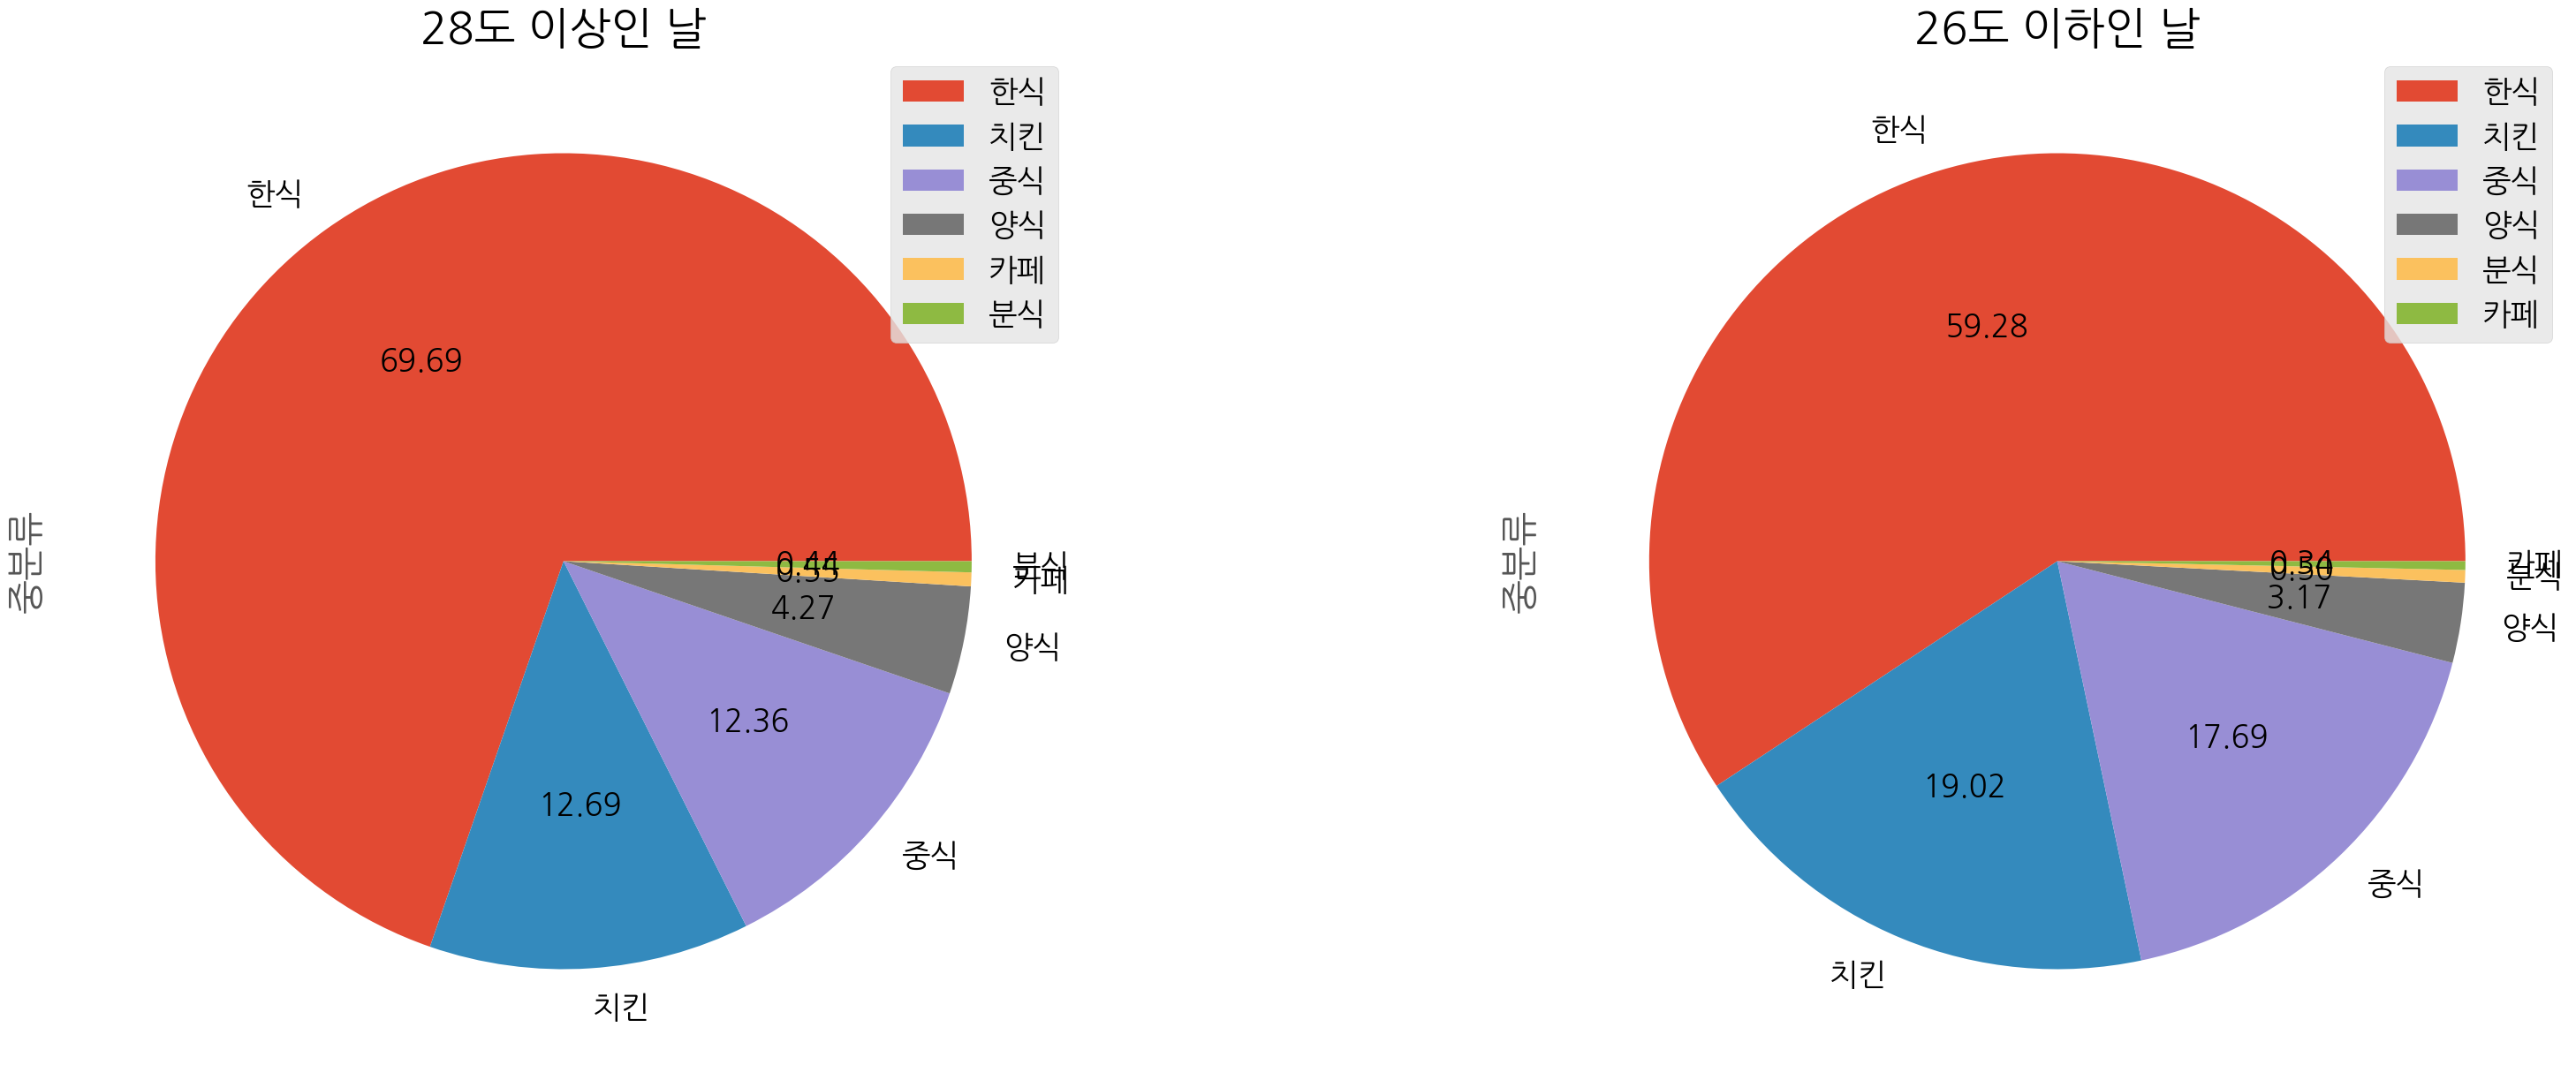

In [135]:
# @title 날씨가 많이 더운 날과 아닌 날의 음식 종류별 배달 비율

# 2022년 8월 데이터
temp_df = pd.read_csv("Tempdata_2008.csv", encoding = "cp949", parse_dates = ["일시"])

# 열 이름 변경
temp_df.columns = ["지점번호", "지역", "일자", "평균기온", "최고기온", "최저기온", "최저기온시각", "일교차", "기타"]

# 불필요한 열 삭제
temp_df = temp_df.drop(columns = ["지점번호", "지역", "최고기온", "최저기온", "최저기온시각", "일교차", "기타"])

# 각 데이터 프레임 병합
tot_df2 = pd.merge(call_df, temp_df)

# print(tot_df2)

# 32도 이상일 때 배달량
hot_df = tot_df2[tot_df2["평균기온"] >= 28]
hot_df = pd.DataFrame(hot_df["중분류"].value_counts())

# 28도 이하일 때 배달량
cool_df = tot_df2[tot_df2["평균기온"] <= 26]
cool_df = pd.DataFrame(cool_df["중분류"].value_counts())

# figure 객체와 1행 2열의 서브 그래프 세트 만들기
figure, (ax3, ax4) = plt.subplots(1, 2)

# figure 객체의 사이즈를 가로 40, 세로 15로 설정하기
figure.set_size_inches(40, 15)

# 원 그래프를 각 위치에 배치하기
hot_df.plot.pie(y = "중분류", autopct = "%.2f", ax = ax3)
cool_df.plot.pie(y = "중분류", autopct = "%.2f", ax = ax4)

# 제목 설정하기
ax3.set(title = "28도 이상인 날")
ax4.set(title = "26도 이하인 날")